## Function 5

Yield in a Chemical Reaction
This time you are trying to optimise another four-dimensional black-box. It corresponds to the yield of a chemical process after processing in some factory. This type of process tends to be unimodal. Try to find the combination of chemicals that maximizes the yield!

1. Load the provided initial data.
2. Visualize the current data to understand its structure.
3. Fit a Gaussian Process (GP) surrogate model.
4. Use Bayesian optimization to suggest the next best point(s).

In [1]:
# update data weekly
import numpy as np
import os

# Function number (update this as needed)
function_id = 5  # change for f2, f3, etc.

# Load original data
inputs_path = f'function_{function_id}/initial_inputs.npy'
outputs_path = f'function_{function_id}/initial_outputs.npy'
inputs = np.load(inputs_path)
outputs = np.load(outputs_path)

# Load new data (replace this with your actual new submissions)
# Example: new 2D point with corresponding output
# week1:0.224189	0.846480	0.879484	0.878516	1088.858192
# week2:0.460387	0.498557	0.477944	0.494719	42.1884195
# week3_1: 0.124189	0.876480	0.879484	0.858516  and 1126.237578495339
# week3_2: 0.150189	0.806480	0.929484	0.808516	and 900.7749314
# w4-1t: 0.124189	0.87648	0.879484	0.858516	and 1126.237578
# w4-2f: 0.124189	0.976480	0.819484	0.858516	and 1445.408085
# w5-1t: 0.104189	0.979480	0.809484	0.850516	and 1384.908450
# w5-2f: 0.154189	0.976480	0.809484	0.848516	and 1354.9992482887
# w6-1t: 0.134179	0.976480	0.819484	0.860516  and 1455.791437311
# w6-2f: 0.135179	0.977480	0.819984	0.860616 and 1465.96073687963
# w7-1t: 0.136179	0.977480	0.820084	0.860616 and 1466.4325077075
# w7-2f: 0.137179	0.977480	0.822084	0.860616 and 1475.38550458936
# w8-1t: 0.138179	0.977480	0.825084	0.860616 and 1466.4325077075
# w8-2f: 0.137179	0.978480	0.822084	0.861616 and 1488.03103895985
# w9-1t: 0.137179	0.979480	0.822084	0.862616 and 1500.7712184308
# W9-2f: 0.136179	0.980480	0.822084	0.862816 and 1509.38533096629
# w10-1t: 0.150897	0.999999	0.904292	0.948878 and 2817.9987205603
# w10-2f: 0.151000	0.999999	0.904500	0.950078 and 2831.10297161555

new_inputs = np.array([[0.151000, 0.999999, 0.904500, 0.950078]])
new_outputs = np.array([2831.10297161555])

# Concatenate new data to existing
updated_inputs = np.vstack([inputs, new_inputs])
updated_outputs = np.concatenate([outputs, new_outputs])
print("updated_inputs shape:", updated_inputs.shape)
print("updated_outputs shape:", updated_outputs.shape)
# Optionally: save backup copies before overwriting
np.save(f'function_{function_id}/backup_inputs.npy', inputs)
np.save(f'function_{function_id}/backup_outputs.npy', outputs)

# Save updated files
np.save(inputs_path, updated_inputs)
np.save(outputs_path, updated_outputs)

print("Updated data saved.")

updated_inputs shape: (38, 4)
updated_outputs shape: (38,)
Updated data saved.


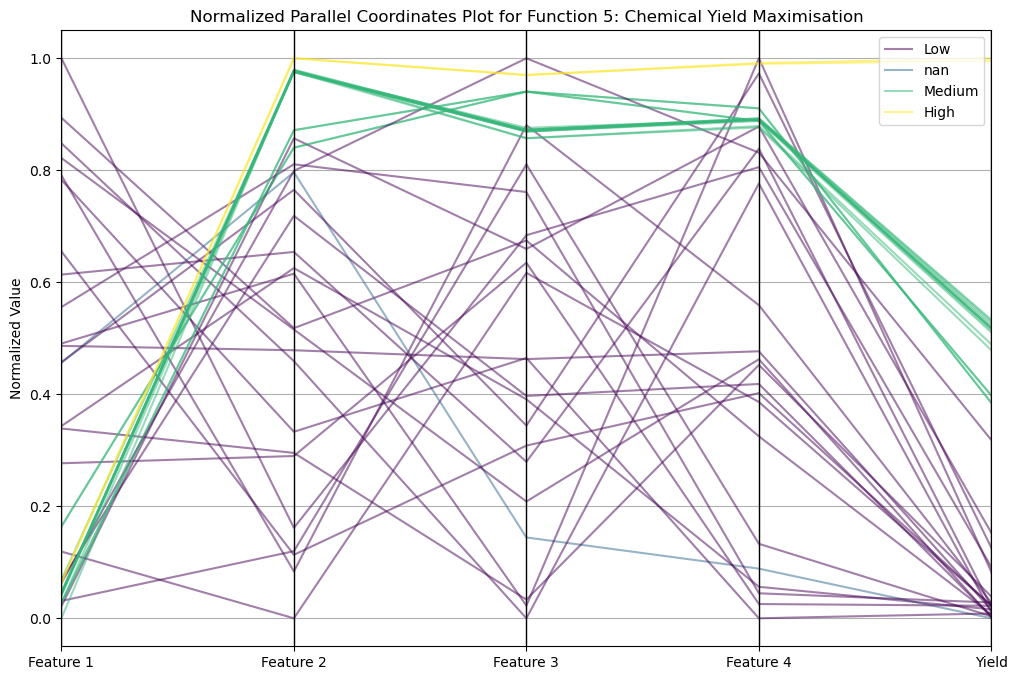

Suggested next best input: [0.151    0.999999 0.9045   0.950078]
Suggested next best input (6 decimals): ['0.151000', '0.999999', '0.904500', '0.950078']
Predicted yield at suggested input: 2831.102971615553


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import minimize

# Load initial data for Function 5
inputs_f5 = np.load('function_5/initial_inputs.npy')
outputs_f5 = np.load('function_5/initial_outputs.npy')

# Prepare data for parallel coordinates plot
feature_columns = [f'Feature {i+1}' for i in range(inputs_f5.shape[1])]
data_f5 = pd.DataFrame(inputs_f5, columns=feature_columns)
data_f5['Yield'] = outputs_f5

# Normalize for visualization
scaler = MinMaxScaler()
data_f5_normalized = pd.DataFrame(scaler.fit_transform(data_f5), columns=data_f5.columns)

# Bin the output for color coding
bins = np.linspace(data_f5_normalized['Yield'].min(), data_f5_normalized['Yield'].max(), 4)
data_f5_normalized['Yield Level'] = pd.cut(data_f5_normalized['Yield'], bins, labels=['Low', 'Medium', 'High'])

# Parallel coordinates plot
plt.figure(figsize=(12, 8))
parallel_coordinates(data_f5_normalized, class_column='Yield Level', colormap='viridis', alpha=0.5)
plt.title('Normalized Parallel Coordinates Plot for Function 5: Chemical Yield Maximisation')
plt.ylabel('Normalized Value')
plt.grid(True)
plt.show()

# Fit Extra Trees model as surrogate
model = ExtraTreesRegressor(n_estimators=200, random_state=42)
model.fit(inputs_f5, outputs_f5)

# Identify current best input (max yield)
best_idx = np.argmax(outputs_f5)
x_best = inputs_f5[best_idx]
y_best = outputs_f5[best_idx]

# Define a trust region around the best point
trust_radius = 0.1  # Adjustable
bounds = [(max(0.0, x_best[i] - trust_radius), min(1.0, x_best[i] + trust_radius)) for i in range(inputs_f5.shape[1])]

# Objective: negative predicted yield (to maximize)
def objective(x):
    return -model.predict(x.reshape(1, -1))[0]

# Optimize within the trust region
res = minimize(objective, x_best, bounds=bounds, method='L-BFGS-B')
next_input = res.x
predicted_yield = -res.fun

print("Suggested next best input:", next_input)
print("Suggested next best input (6 decimals):", [f"{x:.6f}" for x in next_input])
print("Predicted yield at suggested input:", predicted_yield)


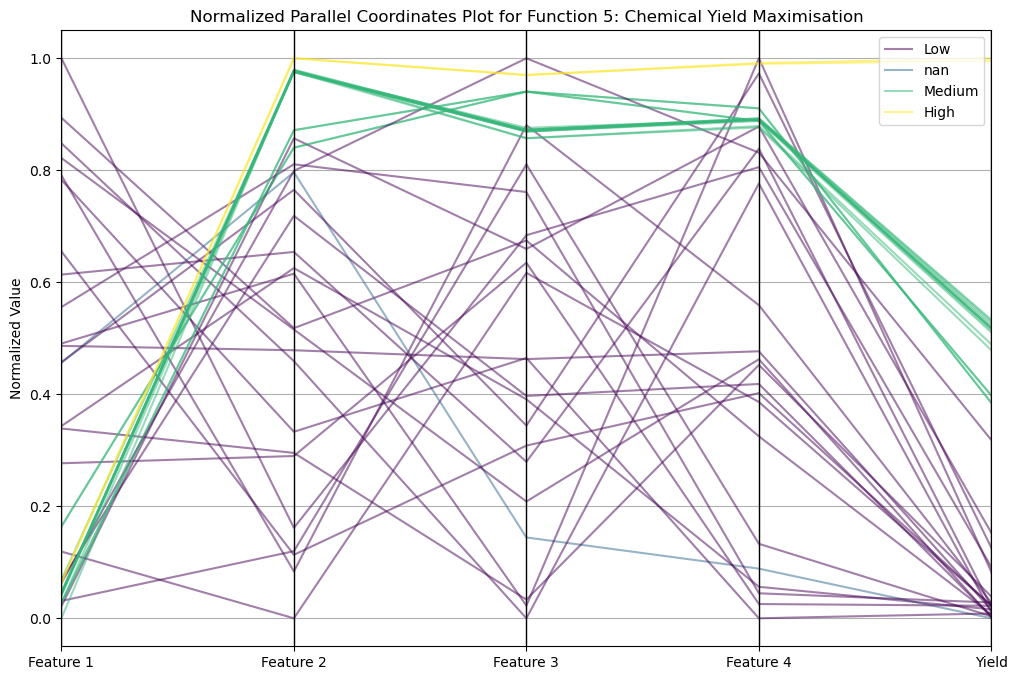

Suggested next best input with custom preferences: [0.31754685 0.70086545 0.64276251 0.66157091]
Suggested next best input (6 decimals): ['0.317547', '0.700865', '0.642763', '0.661571']
Predicted yield at suggested input: 0.0004471822672541814


In [7]:
# Used this one for submission 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.stats import norm
from scipy.optimize import minimize
from sklearn.preprocessing import MinMaxScaler

# Load initial data for Function 5
inputs_f5 = np.load('function_5/initial_inputs.npy')
outputs_f5 = np.load('function_5/initial_outputs.npy')

# Prepare data for parallel coordinates plot
feature_columns = [f'Feature {i+1}' for i in range(inputs_f5.shape[1])]
data_f5 = pd.DataFrame(inputs_f5, columns=feature_columns)
data_f5['Yield'] = outputs_f5

# Apply Min-Max normalization
scaler = MinMaxScaler()
data_f5_normalized = pd.DataFrame(scaler.fit_transform(data_f5), columns=data_f5.columns)

# Categorize normalized outputs for plotting
bins = np.linspace(data_f5_normalized['Yield'].min(), data_f5_normalized['Yield'].max(), 4)
data_f5_normalized['Yield Level'] = pd.cut(data_f5_normalized['Yield'], bins, labels=['Low', 'Medium', 'High'])

# Parallel coordinates plot with normalized data
plt.figure(figsize=(12, 8))
parallel_coordinates(data_f5_normalized, class_column='Yield Level', colormap='viridis', alpha=0.5)
plt.title('Normalized Parallel Coordinates Plot for Function 5: Chemical Yield Maximisation')
plt.ylabel('Normalized Value')
plt.grid(True)
plt.show()

# Gaussian Process Regression Model with Matern kernel
gp = GaussianProcessRegressor(kernel=Matern(nu=2.5), n_restarts_optimizer=15)
gp.fit(inputs_f5, outputs_f5)

# Expected Improvement (EI) acquisition function with preference for lower Feature 1 and higher Feature 2,3,4
def expected_improvement_custom(x, gp, y_max):
    penalty = -x[0] + np.sum(x[1:])  # Encourage low Feature 1 and high Features 2,3,4
    mean, std = gp.predict(x.reshape(1, -1), return_std=True)
    improvement = mean + 0.1 * penalty - y_max
    Z = improvement / std
    ei = improvement * norm.cdf(Z) + std * norm.pdf(Z)
    return -ei

# Current best observation for maximization
y_max = np.max(outputs_f5)

# Optimization bounds based on observed data
bounds = [(np.min(inputs_f5[:, i]), np.max(inputs_f5[:, i])) for i in range(inputs_f5.shape[1])]

# Optimize EI with custom preferences to find next best input
result = minimize(expected_improvement_custom,
                  x0=np.mean(inputs_f5, axis=0),
                  args=(gp, y_max),
                  bounds=bounds,
                  method='L-BFGS-B')

next_best_input = result.x
print("Suggested next best input with custom preferences:", next_best_input)
print("Suggested next best input (6 decimals):", [f"{x:.6f}" for x in next_best_input])
# Predicted yield at suggested input
predicted_yield, _ = gp.predict(next_best_input.reshape(1, -1), return_std=True)

print("Predicted yield at suggested input:", predicted_yield[0])

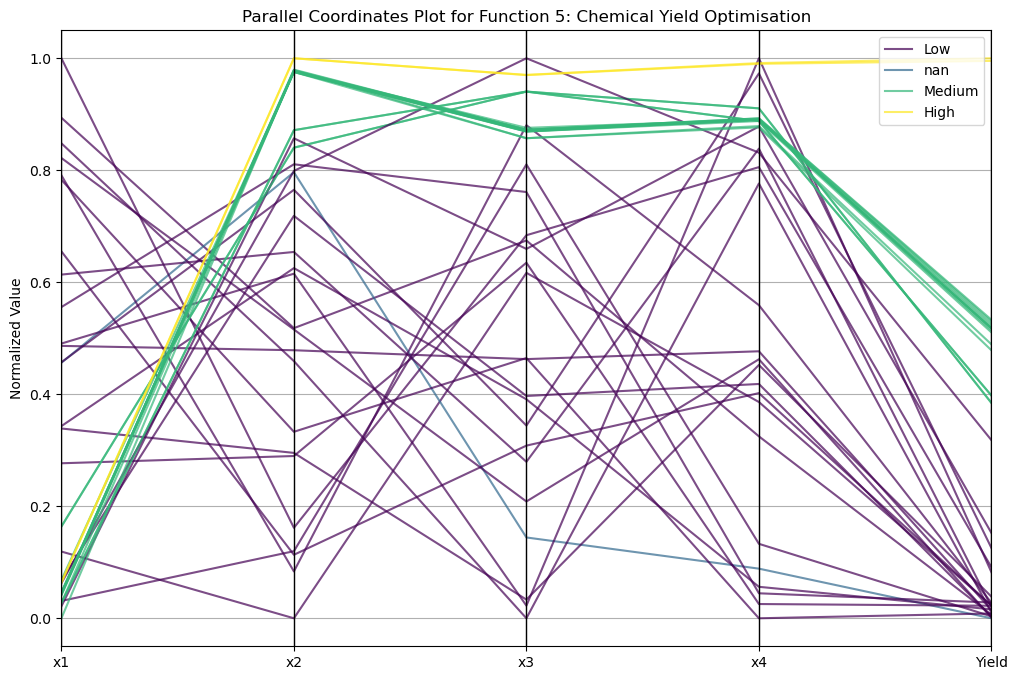

First suggested next best input (x1 to x4): [0.31756437 0.70086367 0.64278035 0.66156394]
First suggested input (6 decimals): ['0.317564', '0.700864', '0.642780', '0.661564']
Predicted yield: 35.9810613287824 ± 501.4738796239354

Second suggested next best input (x1 to x4): [0.83647799 0.999999   0.08894684 0.9576439 ]
Second suggested input (6 decimals): ['0.836478', '0.999999', '0.088947', '0.957644']
Predicted yield: 556.4281240386956 ± 748.8392732606184

Feature Importance:
x1: 0.1744
x2: 0.6593
x3: 0.4016
x4: 0.4668


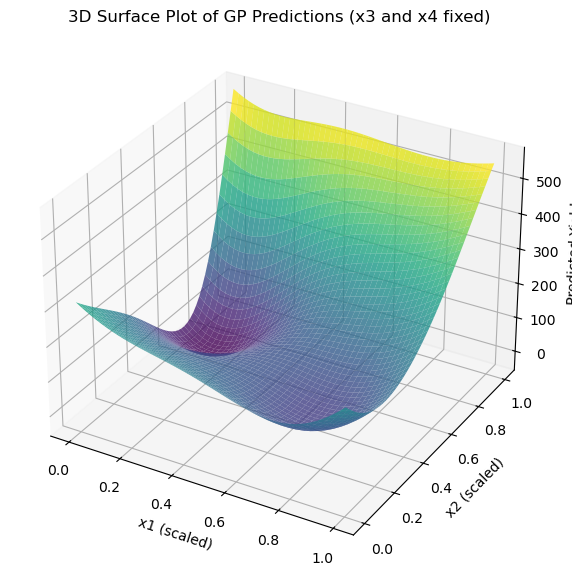

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.stats import norm
from scipy.optimize import minimize
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# Step 1: Load the initial data
# -------------------------------
inputs_f5 = np.load('function_5/initial_inputs.npy')
outputs_f5 = np.load('function_5/initial_outputs.npy')

# -------------------------------
# Step 2: Visualize with parallel coordinates plot
# -------------------------------
feature_columns = [f'x{i+1}' for i in range(inputs_f5.shape[1])]
data_f5 = pd.DataFrame(inputs_f5, columns=feature_columns)
data_f5['Yield'] = outputs_f5

# Normalize for plotting
scaler_plot = MinMaxScaler()
data_f5_normalized = pd.DataFrame(scaler_plot.fit_transform(data_f5), columns=data_f5.columns)

# Bucket yields for color coding
bins = np.linspace(data_f5_normalized['Yield'].min(), data_f5_normalized['Yield'].max(), 4)
data_f5_normalized['Yield Level'] = pd.cut(data_f5_normalized['Yield'], bins, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(12, 8))
parallel_coordinates(data_f5_normalized, class_column='Yield Level', colormap='viridis', alpha=0.7)
plt.title('Parallel Coordinates Plot for Function 5: Chemical Yield Optimisation')
plt.ylabel('Normalized Value')
plt.grid(True)
plt.show()

# -------------------------------
# Step 3: Scale data for GP fitting
# -------------------------------
scaler_gp = MinMaxScaler()
inputs_scaled = scaler_gp.fit_transform(inputs_f5)

# Fit Gaussian Process surrogate model
gp = GaussianProcessRegressor(
    kernel=Matern(nu=2.5),
    alpha=1e-3,  # Small noise term to stabilize fitting
    n_restarts_optimizer=40,  # Increased number of optimizer restarts
    normalize_y=True
)
gp.fit(inputs_scaled, outputs_f5)

# -------------------------------
# Step 4: Bayesian Optimization — Expected Improvement
# -------------------------------
def expected_improvement(x_scaled, gp, y_max, xi=0.01):
    mean, std = gp.predict(x_scaled.reshape(1, -1), return_std=True)
    imp = mean - y_max - xi
    Z = imp / std
    ei = imp * norm.cdf(Z) + std * norm.pdf(Z)
    return -ei

# Current best yield observed
y_max = np.max(outputs_f5)

# Define bounds in scaled space
bounds_scaled = [(0.0, 1.0) for _ in range(inputs_f5.shape[1])]

# -------------------------------
# Step 5: Suggest first next best input
# -------------------------------
result1 = minimize(expected_improvement,
                   x0=np.mean(inputs_scaled, axis=0),
                   args=(gp, y_max),
                   bounds=bounds_scaled,
                   method='L-BFGS-B')

next_best_input_scaled1 = result1.x
next_best_input1 = scaler_gp.inverse_transform(next_best_input_scaled1.reshape(1, -1)).flatten()
predicted_yield1, predicted_std1 = gp.predict(next_best_input_scaled1.reshape(1, -1), return_std=True)

print("First suggested next best input (x1 to x4):", next_best_input1)
print("First suggested input (6 decimals):", [f"{x:.6f}" for x in next_best_input1])
print("Predicted yield:", predicted_yield1[0], "±", predicted_std1[0])

# -------------------------------
# Step 6: Suggest second next best input (different starting point)
# -------------------------------
x0_random = np.random.uniform(0, 1, inputs_f5.shape[1])
result2 = minimize(expected_improvement,
                   x0=x0_random,
                   args=(gp, y_max),
                   bounds=bounds_scaled,
                   method='L-BFGS-B')

next_best_input_scaled2 = result2.x
next_best_input2 = scaler_gp.inverse_transform(next_best_input_scaled2.reshape(1, -1)).flatten()
predicted_yield2, predicted_std2 = gp.predict(next_best_input_scaled2.reshape(1, -1), return_std=True)

print("\nSecond suggested next best input (x1 to x4):", next_best_input2)
print("Second suggested input (6 decimals):", [f"{x:.6f}" for x in next_best_input2])
print("Predicted yield:", predicted_yield2[0], "±", predicted_std2[0])

# -------------------------------
# Step 7: Feature Importance (Permutation)
# -------------------------------
perm_importance = permutation_importance(gp, inputs_scaled, outputs_f5, n_repeats=30, random_state=42)
print("\nFeature Importance:")
for i, col in enumerate(feature_columns):
    print(f"{col}: {perm_importance.importances_mean[i]:.4f}")

# -------------------------------
# Step 8: 3D Surface Plot (Fix x3 and x4 at mean values)
# -------------------------------
if inputs_f5.shape[1] >= 2:
    x = np.linspace(0, 1, 50)
    y = np.linspace(0, 1, 50)
    X, Y = np.meshgrid(x, y)
    Z_input = np.zeros((X.size, inputs_f5.shape[1]))
    Z_input[:, 0] = X.ravel()
    Z_input[:, 1] = Y.ravel()
    # Fix x3 and x4 at mean scaled values
    for i in range(2, inputs_f5.shape[1]):
        Z_input[:, i] = np.mean(inputs_scaled[:, i])
    Z_pred = gp.predict(Z_input).reshape(X.shape)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z_pred, cmap='viridis', alpha=0.8)
    ax.set_xlabel('x1 (scaled)')
    ax.set_ylabel('x2 (scaled)')
    ax.set_zlabel('Predicted Yield')
    ax.set_title('3D Surface Plot of GP Predictions (x3 and x4 fixed)')
    plt.show()



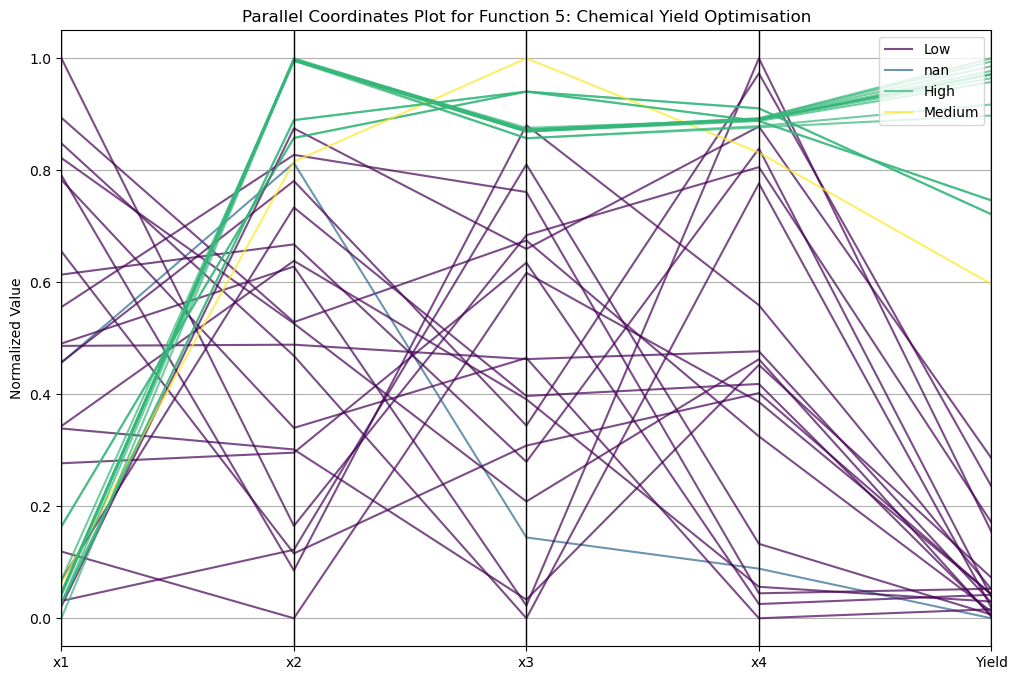

Suggested next best input (around peak): [0.1508969 1.        0.9042924 0.9488776]
Suggested next best input (6 decimals): ['0.150897', '1.000000', '0.904292', '0.948878']
Predicted yield: 1938.8784255197118 ± 105.23245914426097

Feature Importance:
x1: 0.0926
x2: 0.8869
x3: 0.4319
x4: 0.3934


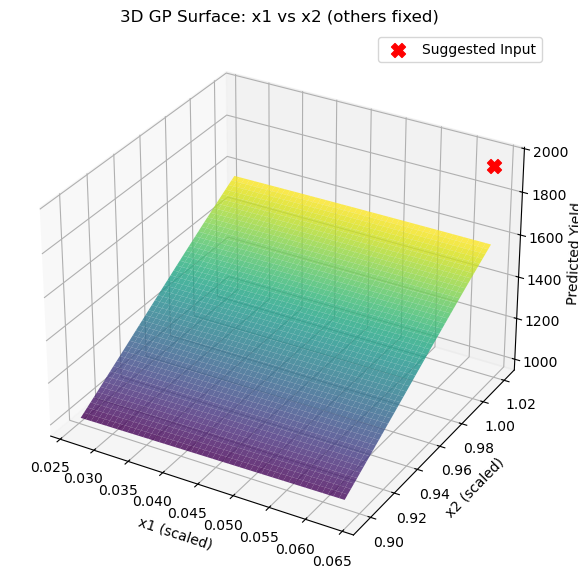

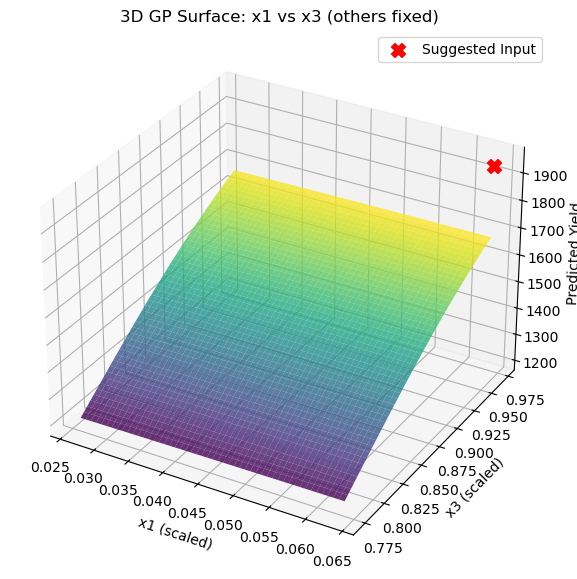

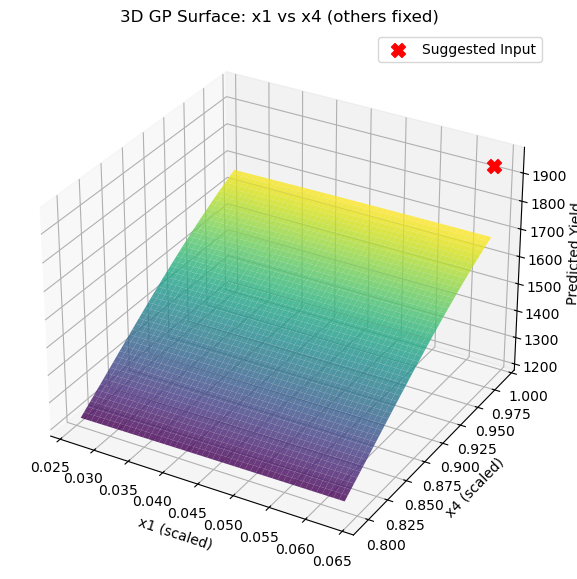

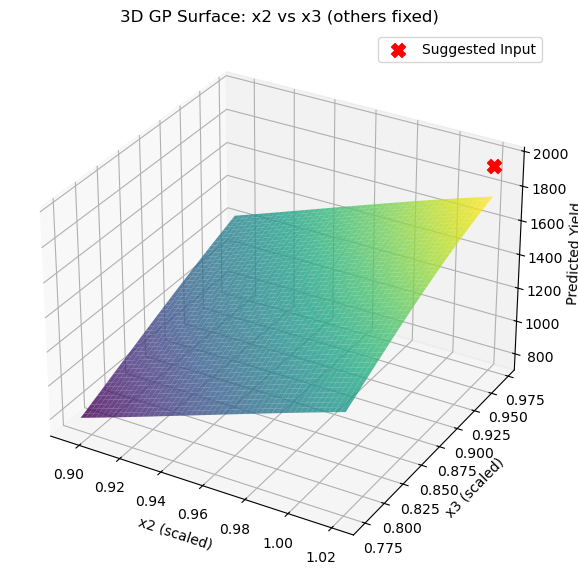

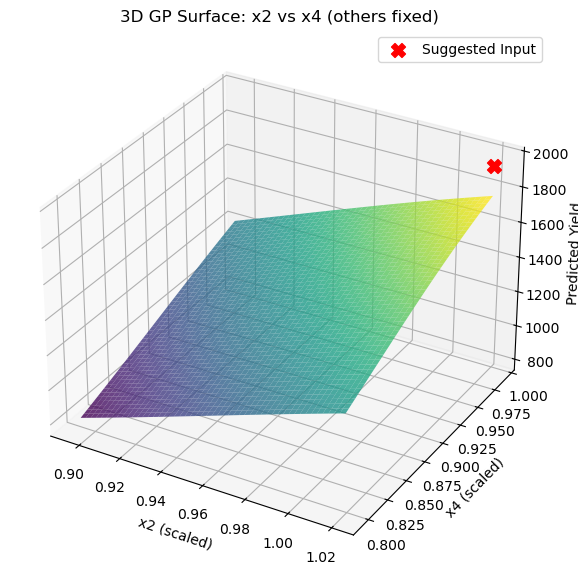

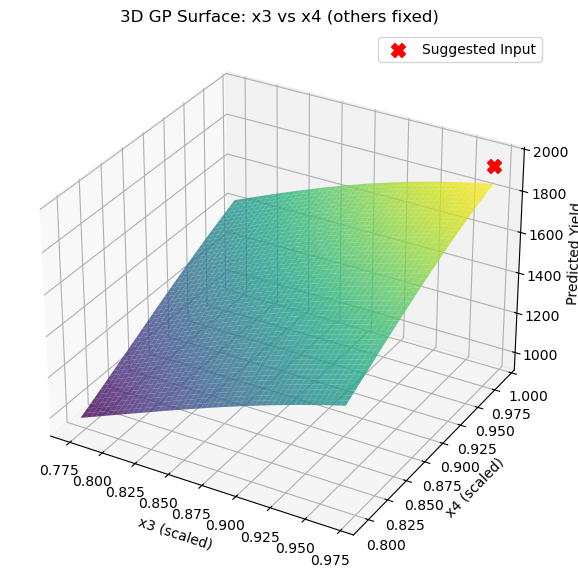

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from scipy.stats import norm
from scipy.optimize import minimize
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations

# -------------------------------
# Step 1: Load the initial data
# -------------------------------
inputs_f5 = np.load('function_5/initial_inputs.npy')
outputs_f5 = np.load('function_5/initial_outputs.npy')

# -------------------------------
# Step 2: Visualize with parallel coordinates plot
# -------------------------------
feature_columns = [f'x{i+1}' for i in range(inputs_f5.shape[1])]
data_f5 = pd.DataFrame(inputs_f5, columns=feature_columns)
data_f5['Yield'] = outputs_f5

scaler_plot = MinMaxScaler()
data_f5_normalized = pd.DataFrame(scaler_plot.fit_transform(data_f5), columns=data_f5.columns)

bins = np.linspace(data_f5_normalized['Yield'].min(), data_f5_normalized['Yield'].max(), 4)
data_f5_normalized['Yield Level'] = pd.cut(data_f5_normalized['Yield'], bins, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(12, 8))
parallel_coordinates(data_f5_normalized, class_column='Yield Level', colormap='viridis', alpha=0.7)
plt.title('Parallel Coordinates Plot for Function 5: Chemical Yield Optimisation')
plt.ylabel('Normalized Value')
plt.grid(True)
plt.show()

# -------------------------------
# Step 3: GP model fitting
# -------------------------------
scaler_gp = MinMaxScaler()
inputs_scaled = scaler_gp.fit_transform(inputs_f5)

gp = GaussianProcessRegressor(kernel=Matern(nu=2.5), alpha=1e-3, n_restarts_optimizer=40, normalize_y=True)
gp.fit(inputs_scaled, outputs_f5)

# -------------------------------
# Step 4: Exploit around best known input
# -------------------------------
peak = np.array([0.137179, 0.979480, 0.822084, 0.862616])
lower_bounds = (peak * 0.9).clip(0.0, 1.0)
upper_bounds = (peak * 1.1).clip(0.0, 1.0)
scaled_bounds_array = scaler_gp.transform(np.vstack([lower_bounds, upper_bounds]))
bounds_scaled = [(float(low), float(high)) for low, high in zip(scaled_bounds_array[0], scaled_bounds_array[1])]

# -------------------------------
# Step 5: Expected Improvement
# -------------------------------
def expected_improvement(x_scaled, gp, y_max, xi=0.01):
    mean, std = gp.predict(x_scaled.reshape(1, -1), return_std=True)
    imp = mean - y_max - xi
    Z = imp / std
    ei = imp * norm.cdf(Z) + std * norm.pdf(Z)
    return -ei

y_max = np.max(outputs_f5)
x0_guess = scaler_gp.transform(peak.reshape(1, -1)).flatten()

result = minimize(expected_improvement, x0=x0_guess, args=(gp, y_max), bounds=bounds_scaled, method='L-BFGS-B')
next_best_input_scaled = result.x
next_best_input = scaler_gp.inverse_transform(next_best_input_scaled.reshape(1, -1)).flatten()
predicted_yield, predicted_std = gp.predict(next_best_input_scaled.reshape(1, -1), return_std=True)

print("Suggested next best input (around peak):", next_best_input)
print("Suggested next best input (6 decimals):", [f"{x:.6f}" for x in next_best_input])
print("Predicted yield:", predicted_yield[0], "±", predicted_std[0])

# -------------------------------
# Step 6: Feature Importance
# -------------------------------
perm_importance = permutation_importance(gp, inputs_scaled, outputs_f5, n_repeats=30, random_state=42)
print("\nFeature Importance:")
for i, col in enumerate(feature_columns):
    print(f"{col}: {perm_importance.importances_mean[i]:.4f}")

# -------------------------------
# Step 7: 3D Surface Plots with overlay
# -------------------------------
feature_names = ['x1', 'x2', 'x3', 'x4']
fixed_point = peak
fixed_point_scaled = scaler_gp.transform(fixed_point.reshape(1, -1)).flatten()
next_scaled = next_best_input_scaled

pairs = list(combinations(range(4), 2))

for i, j in pairs:
    x_range = np.linspace(bounds_scaled[i][0], bounds_scaled[i][1], 50)
    y_range = np.linspace(bounds_scaled[j][0], bounds_scaled[j][1], 50)
    X, Y = np.meshgrid(x_range, y_range)

    Z_input = np.tile(fixed_point_scaled, (X.size, 1))
    Z_input[:, i] = X.ravel()
    Z_input[:, j] = Y.ravel()

    Z_pred = gp.predict(Z_input).reshape(X.shape)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z_pred, cmap='viridis', alpha=0.8)

    ax.scatter(next_scaled[i], next_scaled[j],
               gp.predict(next_scaled.reshape(1, -1))[0],
               color='red', marker='X', s=100, label='Suggested Input')

    ax.set_xlabel(f'{feature_names[i]} (scaled)')
    ax.set_ylabel(f'{feature_names[j]} (scaled)')
    ax.set_zlabel('Predicted Yield')
    ax.set_title(f'3D GP Surface: {feature_names[i]} vs {feature_names[j]} (others fixed)')
    ax.legend()
    plt.show()
